1. 데이터 전처리
    - 데이터 로드 (데이터 타입 및 분포 확인)
    - 결측치 확인 (대체 및 제거)
    - 파생변수
    - 원핫인코딩
    - 불필요 컬럼 삭제
    - 이상치 확인 (윈저라이징)
    - Train Test Split (8:2)
2. Modeling
    - LogisticRegression
    - DecisionTree
    - RandomForest
    - XGB
    - LGBM
    평가지표
    - Accuracy
    - Precision
    - Recall
    - F1_score
3. Resampling 후 Modeling (데이터 불균형 문제 처리)
    - OverSamplig
        - RandomOverSampling
        - SMOTE

In [29]:
# 라이브러리 로드
import pandas as pd

# 경고창 제거
import warnings
warnings.filterwarnings('ignore')

## 1-1. 데이터 로드 ( 데이터 타입 및 분포 확인 )

In [30]:
# 데이터 로드
df = pd.read_csv("./fraud_data.csv", index_col=0)
df

,trans_date_trans_time,cc_num,amt,gender,city_pop,dob,unix_time,is_fraud
0,2019-01-01 00:00:18,2703186189652095,4.97,F,3495,1988-03-09,1325376018,0
1,2019-01-01 00:00:44,630423337322,107.23,F,149,1978-06-21,1325376044,0
2,2019-01-01 00:00:51,38859492057661,220.11,M,4154,1962-01-19,1325376051,0
3,2019-01-01 00:01:16,3534093764340240,45.00,M,1939,1967-01-12,1325376076,0
4,2019-01-01 00:03:06,375534208663984,41.96,M,99,1986-03-28,1325376186,0
...,...,...,...,...,...,...,...,...
52519,2019-01-31 23:56:40,3591919803438423,1.42,M,54767,1987-07-25,1328054200,0
52520,2019-01-31 23:56:42,3514865930894695,49.57,M,899,1967-08-30,1328054202,0
52521,2019-01-31 23:57:30,6538891242532018,47.33,F,7155,1977-03-23,1328054250,0
52522,2019-01-31 23:57:36,3543591270174051,116.45,F,922,1972-10-04,1328054256,1


- trans_date_trans_time - 날짜 시간
- cc_num - 신용카드 고객 번호
- amt - 거래량
- gender - 신용카드 소지자의 성별
- city_pop - 신용카드 소지자의 도시인구
- dob - 신용카드 소지자의 생년월일
- unix_time - Unix 트랜잭션 시간
- is_fraud - 이상거래 <--- Target Class

In [31]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52523
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  52524 non-null  object 
 1   cc_num                 52524 non-null  int64  
 2   amt                    52524 non-null  float64
 3   gender                 52524 non-null  object 
 4   city_pop               52524 non-null  int64  
 5   dob                    52524 non-null  object 
 6   unix_time              52524 non-null  int64  
 7   is_fraud               52524 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.6+ MB


In [32]:
# 데이터 분포 확인
df.describe()

,cc_num,amt,city_pop,unix_time,is_fraud
count,5.252400e+04,52524.000000,5.252400e+04,5.252400e+04,52524.000000
mean,4.189116e+17,71.579715,8.962955e+04,1.326715e+09,0.009634
std,1.311804e+18,147.977397,3.011860e+05,7.678044e+05,0.097678
min,6.041621e+10,1.000000,2.300000e+01,1.325376e+09,0.000000
25%,1.800429e+14,9.730000,7.430000e+02,1.326027e+09,0.000000
50%,3.519607e+15,47.790000,2.456000e+03,1.326665e+09,0.000000
75%,4.635331e+15,83.610000,2.112500e+04,1.327358e+09,0.000000
max,4.992346e+18,11872.210000,2.906700e+06,1.328054e+09,1.000000


In [33]:
# is_fraud가 1인 데이터의 분포 확인
df[df["is_fraud"]==1].describe()

,cc_num,amt,city_pop,unix_time,is_fraud
count,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,506.0
mean,2.628105e+17,517.352530,1.475389e+05,1.326826e+09,1.0
std,1.039135e+18,395.005152,4.404496e+05,6.992512e+05,0.0
min,5.619428e+11,4.500000,4.600000e+01,1.325466e+09,1.0
25%,3.409514e+14,120.840000,9.220000e+02,1.326339e+09,1.0
50%,3.527794e+15,347.110000,2.408000e+03,1.326718e+09,1.0
75%,4.642255e+15,897.322500,3.139400e+04,1.327273e+09,1.0
max,4.666315e+18,1334.070000,2.906700e+06,1.328054e+09,1.0


In [34]:
# is_fraud가 0인 데이터의 분포 확인
df[df["is_fraud"]==0].describe()

,cc_num,amt,city_pop,unix_time,is_fraud
count,5.201800e+04,52018.000000,5.201800e+04,5.201800e+04,52018.0
mean,4.204300e+17,67.243504,8.906624e+04,1.326714e+09,0.0
std,1.314096e+18,136.542028,2.994647e+05,7.683695e+05,0.0
min,6.041621e+10,1.000000,2.300000e+01,1.325376e+09,0.0
25%,1.800429e+14,9.650000,7.430000e+02,1.326025e+09,0.0
50%,3.519607e+15,47.430000,2.456000e+03,1.326664e+09,0.0
75%,4.635331e+15,82.630000,2.047800e+04,1.327358e+09,0.0
max,4.992346e+18,11872.210000,2.906700e+06,1.328054e+09,0.0


## 1-2. 결측치 확인

In [35]:
# 결측치 확인
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
amt                      0
gender                   0
city_pop                 0
dob                      0
unix_time                0
is_fraud                 0
dtype: int64

## 1-3. 파생변수

In [36]:
## 같은 카드에서 다음 거래까지 걸린 시간의 차이를 단위(초)로 하여 나타냄
## unix 타임기준으로 발생기록되어있음
df["recency"] = df.groupby(by="cc_num")["unix_time"].diff()
print(df['recency'].value_counts())

# 첫 거래에 있는 na값은 0으로 처리
df["recency"] = df["recency"].fillna(0)

recency
452.0       7
2416.0      7
247.0       7
115.0       7
5220.0      7
           ..
70119.0     1
99180.0     1
119493.0    1
24498.0     1
33275.0     1
Name: count, Length: 38102, dtype: int64


In [37]:
df["dob"].str[:4]

0        1988
1        1978
2        1962
3        1967
4        1986
         ... 
52519    1987
52520    1967
52521    1977
52522    1972
52523    1982
Name: dob, Length: 52524, dtype: object

In [38]:
# trans_date_trans_time : 거래한 날짜 시간, dob : 신용카드 소지자의 생년월일
# 둘의 차이를 이용해 나이 계산
df["age"] = df["trans_date_trans_time"].str[:4].astype(int) - df["dob"].str[:4].astype(int)
df

,trans_date_trans_time,cc_num,amt,gender,city_pop,dob,unix_time,is_fraud,recency,age
0,2019-01-01 00:00:18,2703186189652095,4.97,F,3495,1988-03-09,1325376018,0,0.0,31
1,2019-01-01 00:00:44,630423337322,107.23,F,149,1978-06-21,1325376044,0,0.0,41
2,2019-01-01 00:00:51,38859492057661,220.11,M,4154,1962-01-19,1325376051,0,0.0,57
3,2019-01-01 00:01:16,3534093764340240,45.00,M,1939,1967-01-12,1325376076,0,0.0,52
4,2019-01-01 00:03:06,375534208663984,41.96,M,99,1986-03-28,1325376186,0,0.0,33
...,...,...,...,...,...,...,...,...,...,...
52519,2019-01-31 23:56:40,3591919803438423,1.42,M,54767,1987-07-25,1328054200,0,32928.0,32
52520,2019-01-31 23:56:42,3514865930894695,49.57,M,899,1967-08-30,1328054202,0,47320.0,52
52521,2019-01-31 23:57:30,6538891242532018,47.33,F,7155,1977-03-23,1328054250,0,3179.0,42
52522,2019-01-31 23:57:36,3543591270174051,116.45,F,922,1972-10-04,1328054256,1,281.0,47


## 1-4. 원핫인코딩

In [39]:
# gender 변수 원핫인코딩
df["gender"] = df["gender"].apply(lambda x : 0 if x == "F" else 1)
df

,trans_date_trans_time,cc_num,amt,gender,city_pop,dob,unix_time,is_fraud,recency,age
0,2019-01-01 00:00:18,2703186189652095,4.97,0,3495,1988-03-09,1325376018,0,0.0,31
1,2019-01-01 00:00:44,630423337322,107.23,0,149,1978-06-21,1325376044,0,0.0,41
2,2019-01-01 00:00:51,38859492057661,220.11,1,4154,1962-01-19,1325376051,0,0.0,57
3,2019-01-01 00:01:16,3534093764340240,45.00,1,1939,1967-01-12,1325376076,0,0.0,52
4,2019-01-01 00:03:06,375534208663984,41.96,1,99,1986-03-28,1325376186,0,0.0,33
...,...,...,...,...,...,...,...,...,...,...
52519,2019-01-31 23:56:40,3591919803438423,1.42,1,54767,1987-07-25,1328054200,0,32928.0,32
52520,2019-01-31 23:56:42,3514865930894695,49.57,1,899,1967-08-30,1328054202,0,47320.0,52
52521,2019-01-31 23:57:30,6538891242532018,47.33,0,7155,1977-03-23,1328054250,0,3179.0,42
52522,2019-01-31 23:57:36,3543591270174051,116.45,0,922,1972-10-04,1328054256,1,281.0,47


## 1-5. 불필요 컬럼 삭제

In [40]:
## 'dob', 'trans_date_trans_time', 'cc_num', 'unix_time' 변수 제거
df.drop(['dob', 'trans_date_trans_time', 'cc_num', 'unix_time'], axis=1, inplace=True)
df

,amt,gender,city_pop,is_fraud,recency,age
0,4.97,0,3495,0,0.0,31
1,107.23,0,149,0,0.0,41
2,220.11,1,4154,0,0.0,57
3,45.00,1,1939,0,0.0,52
4,41.96,1,99,0,0.0,33
...,...,...,...,...,...,...
52519,1.42,1,54767,0,32928.0,32
52520,49.57,1,899,0,47320.0,52
52521,47.33,0,7155,0,3179.0,42
52522,116.45,0,922,1,281.0,47


## 1-6. 이상치 확인 (윈저라이징)

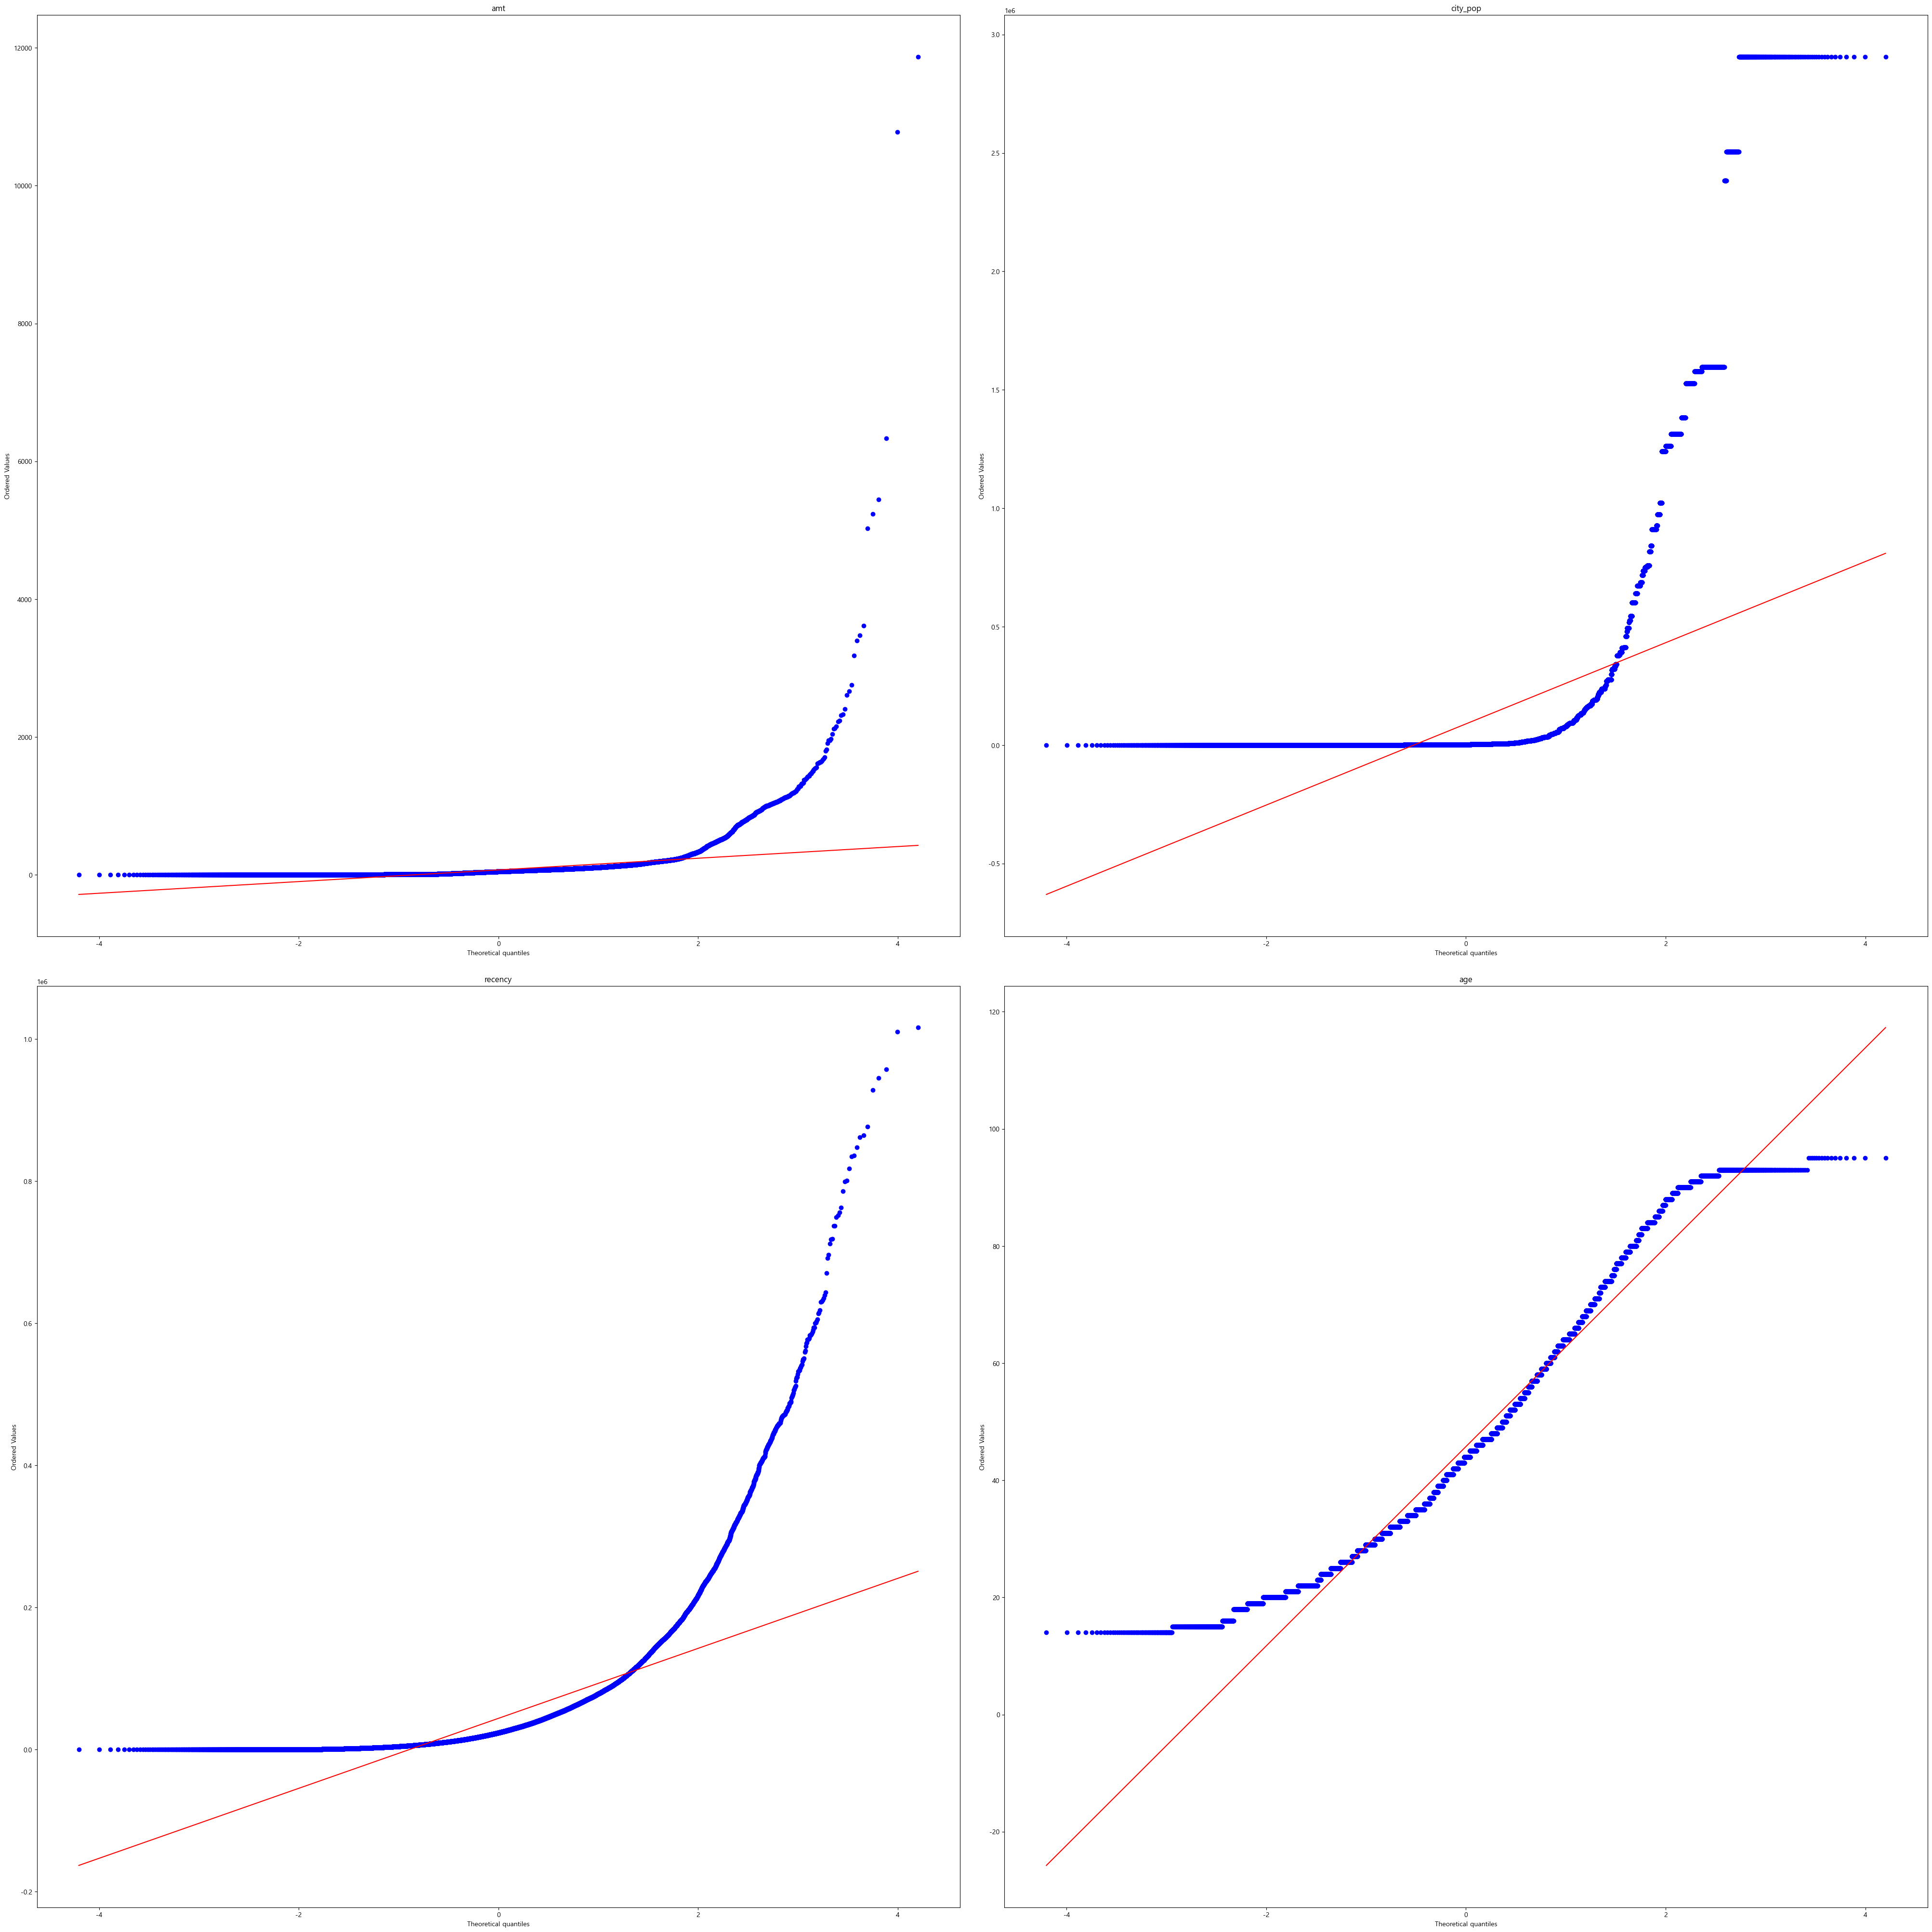

In [41]:
# QQ Plot 그리는 함수 코드
from scipy import stats
import matplotlib.pyplot as plt

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 40))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

## 함수 호출해보기
qqplot(df[['amt', 'city_pop', 'recency', 'age']], 2, 2)

In [42]:
# 윈저라이징 - 양 극단 합 1퍼
from scipy.stats.mstats import winsorize
df["amt"] = winsorize(df["amt"], limits= (0.00, 0.01))
df["city_pop"] = winsorize(df["city_pop"], limits= (0.00, 0.01))
df["recency"] = winsorize(df["recency"], limits= (0.00, 0.01))

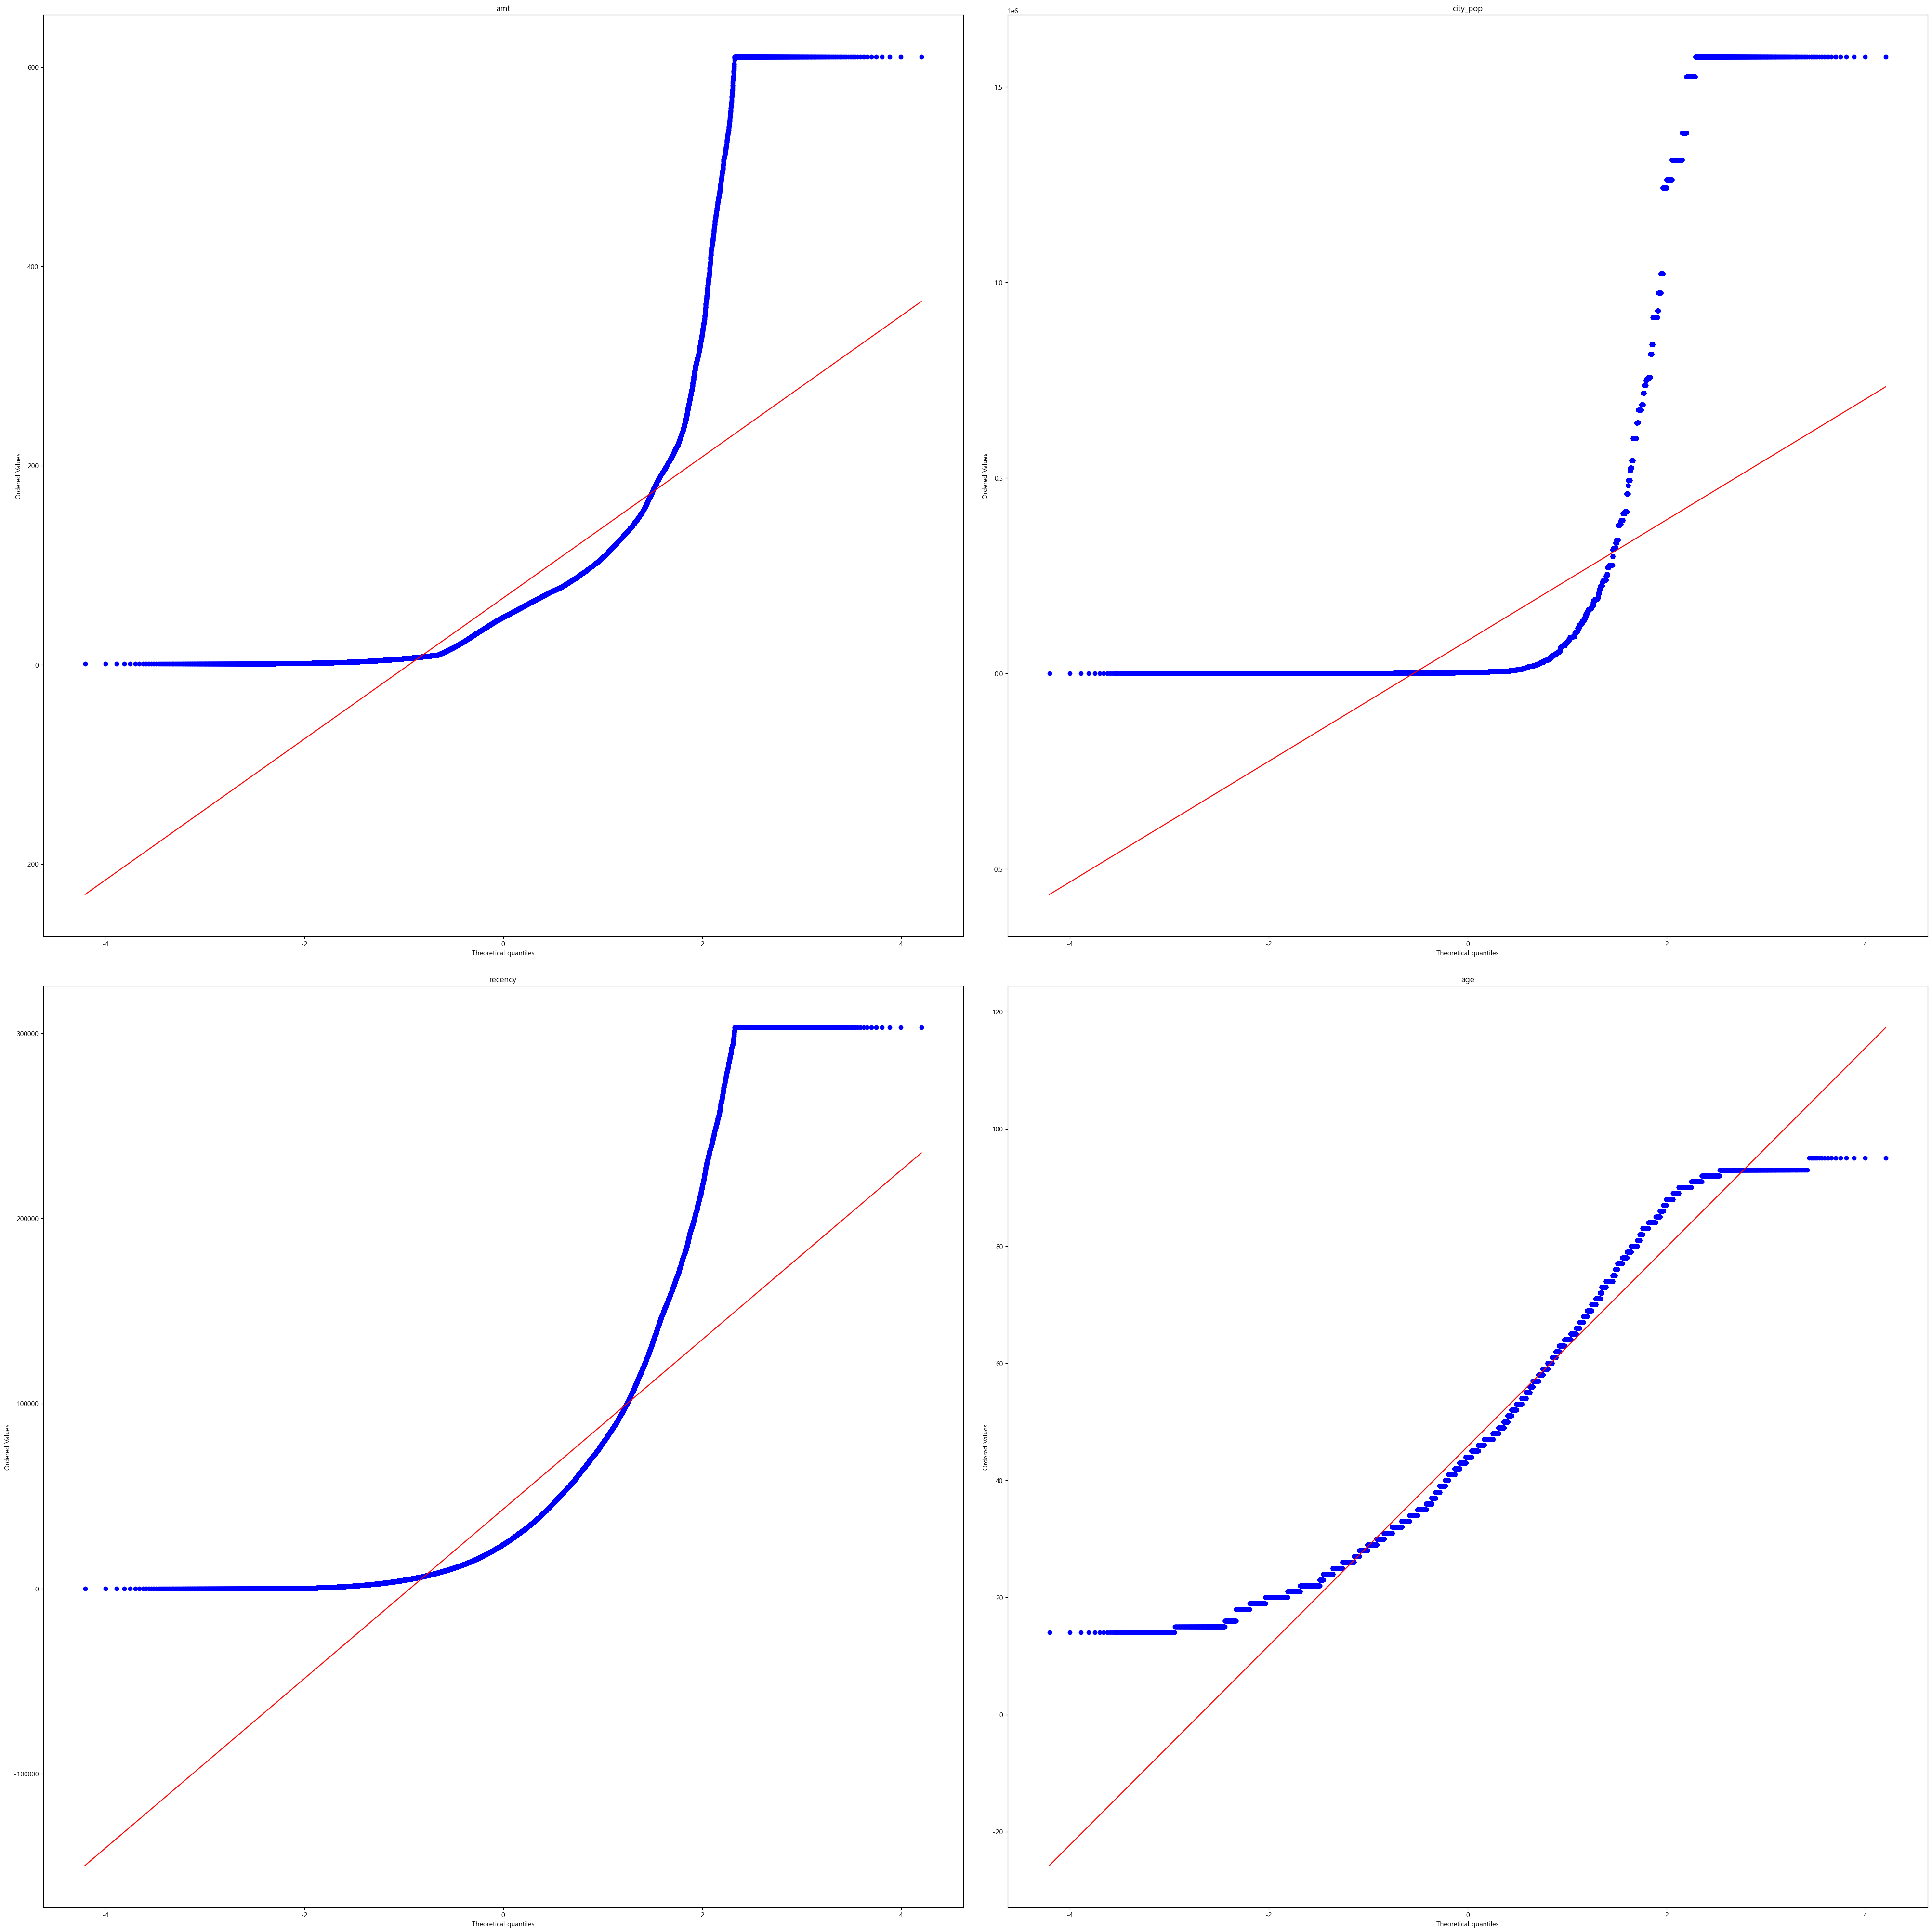

In [43]:
# QQ Plot 그리는 함수 코드
from scipy import stats
import matplotlib.pyplot as plt

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 40))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

## 함수 호출해보기
qqplot(df[['amt', 'city_pop', 'recency', 'age']], 2, 2)

## 1-7. train_test_split 진행
- x, y 값을 지정하고 7:3으로 진행합니다. 
    * Train Data / Test Data 1,0 비율은 동등하게 나눕니다.
- y : is_fraud

In [44]:
from sklearn.model_selection import train_test_split

x = df.drop(["is_fraud"], axis = 1)
y = df[["is_fraud"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

In [48]:
# train 에서의 이상거래와 정상거래 비율 확인
y_train["is_fraud"].value_counts()

is_fraud
0    36412
1      354
Name: count, dtype: int64

In [49]:
# test 에서의 이상거래와 정상거래 비율 확인
y_test["is_fraud"].value_counts()

is_fraud
0    15606
1      152
Name: count, dtype: int64

# 2. Modeling

In [55]:
# 모델 라이브러리 로드
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [56]:
# 모델 함수
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    
    for clf in models:
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        results = (round(accuracy_score(y_test, pred),2),
                    round(precision_score(y_test, pred),2),
                    round(recall_score(y_test, pred),2),
                    round(f1_score(y_test, pred),2))
        rdict['model'].append(clf); 
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

        # print(results)

    rdf = pd.DataFrame(data=rdict)
    return rdf

In [51]:
# # for 문 1998 ~ 2050 월드컵
# for i in range(1998, 2051, 4) :
#     print(i)

1998
2002
2006
2010
2014
2018
2022
2026
2030
2034
2038
2042
2046
2050


In [57]:
# 모델 함수 호출하기
model_basic(X_train, y_train, X_test, y_test)

,model,accuracy,precision,recall,f1_score
0,LogisticRegression(),0.99,0.43,0.17,0.24
1,DecisionTreeClassifier(),0.99,0.41,0.42,0.42
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.99,0.80,0.42,0.55
3,"XGBClassifier(base_score=None, booster=None, c...",0.99,0.88,0.55,0.67
4,LGBMClassifier(),0.99,0.80,0.55,0.65


## 3. Resampling 후 Modeling (데이터 불균형 문제 처리)

https://techblog-history-younghunjo1.tistory.com/123

In [70]:
# RandomOverSampling
from imblearn.over_sampling import RandomOverSampler

X_resampled, y_resampled = RandomOverSampler(random_state=0, sampling_strategy=0.5).fit_resample(X_train, y_train)

In [71]:
# RandomOverSampler 후 모델 함수 호출
model_basic(X_resampled, y_resampled, X_test, y_test)

,model,accuracy,precision,recall,f1_score
0,LogisticRegression(),0.95,0.12,0.68,0.20
1,DecisionTreeClassifier(),0.99,0.42,0.36,0.39
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.99,0.74,0.49,0.59
3,"XGBClassifier(base_score=None, booster=None, c...",0.99,0.72,0.77,0.74
4,LGBMClassifier(),0.99,0.54,0.85,0.66


In [72]:
# SMOTE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=0, sampling_strategy=0.5).fit_resample(X_train, y_train)

In [73]:
# SMOTE 후 모델 함수 호출
model_basic(X_resampled, y_resampled, X_test, y_test)

,model,accuracy,precision,recall,f1_score
0,LogisticRegression(),0.95,0.12,0.70,0.20
1,DecisionTreeClassifier(),0.96,0.14,0.51,0.22
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.98,0.27,0.62,0.38
3,"XGBClassifier(base_score=None, booster=None, c...",0.98,0.30,0.66,0.41
4,LGBMClassifier(),0.98,0.25,0.76,0.38
